In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kmeans_dataset_with_outliers.csv')
df.head()

,X,Y,Label
0,1.248357,1.760413,Cluster 1
1,0.930868,1.907171,Cluster 1
2,1.323844,1.446833,Cluster 1
3,1.761515,1.401897,Cluster 1
4,0.882923,2.406263,Cluster 1


Final Centroids (Cluster Centers):
[[7.5 6.5]
 [2.5 3. ]]

Cluster Assignments:
Point A: Cluster 2
Point B: Cluster 2
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1


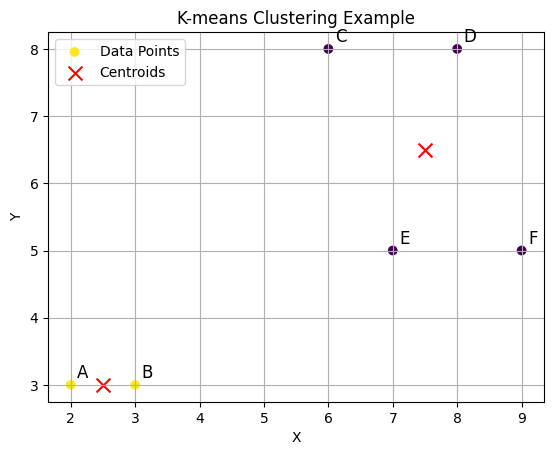

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data points (A, B, C, D, E, F)
data = np.array([
    [2, 3],  # Point A
    [3, 3],  # Point B
    [6, 8],  # Point C
    [8, 8],  # Point D
    [7, 5],  # Point E
    [9, 5]   # Point F
])

# Perform K-means clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {chr(65+i)}: Cluster {label+1}")

# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Annotate points
for i, point in enumerate(data):
    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)

plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [5]:
df.drop(columns=['Label'])

,X,Y
0,1.248357,1.760413
1,0.930868,1.907171
2,1.323844,1.446833
3,1.761515,1.401897
4,0.882923,2.406263
...,...,...
195,-22.261882,-31.187884
196,-3.630160,-14.664777
197,8.365611,-42.226536
198,47.439481,48.621074


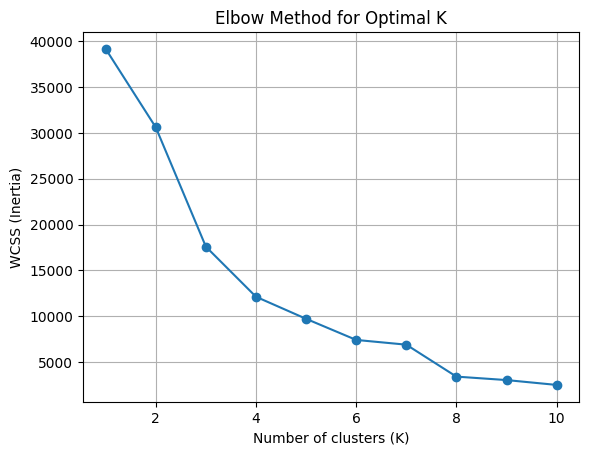

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

x = df.select_dtypes(include=[np.number])  # This will select only numeric columns

# Check for NaN values and handle them if necessary
if x.isnull().values.any():
    x = x.fillna(0)  # Example: fill NaN with 0, or you can drop them

# List to store the within-Cluster Sum of Squares (WCSS) for different K values
wcss = []

# Test different values of K (number of clusters)
for k in range(1, 11):  # Trying K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # inertia is the WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')  # Use 'o' for circle markers
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid()
plt.show()


Final Centroids (Cluster Centers):
[[  3.4533545    4.43198661]
 [  5.60077105  44.70614033]
 [-35.88444221  42.3210902 ]
 [ 46.5737542   -5.10157882]
 [  8.36561119 -42.2265363 ]
 [ 46.24031459  43.82372642]
 [-36.77919573 -15.90204554]]

Cluster Assignments:
Point 1: Cluster 1
Point 2: Cluster 1
Point 3: Cluster 1
Point 4: Cluster 1
Point 5: Cluster 1
Point 6: Cluster 1
Point 7: Cluster 1
Point 8: Cluster 1
Point 9: Cluster 1
Point 10: Cluster 1
Point 11: Cluster 1
Point 12: Cluster 1
Point 13: Cluster 1
Point 14: Cluster 1
Point 15: Cluster 1
Point 16: Cluster 1
Point 17: Cluster 1
Point 18: Cluster 1
Point 19: Cluster 1
Point 20: Cluster 1
Point 21: Cluster 1
Point 22: Cluster 1
Point 23: Cluster 1
Point 24: Cluster 1
Point 25: Cluster 1
Point 26: Cluster 1
Point 27: Cluster 1
Point 28: Cluster 1
Point 29: Cluster 1
Point 30: Cluster 1
Point 31: Cluster 1
Point 32: Cluster 1
Point 33: Cluster 1
Point 34: Cluster 1
Point 35: Cluster 1
Point 36: Cluster 1
Point 37: Cluster 1
Point 38

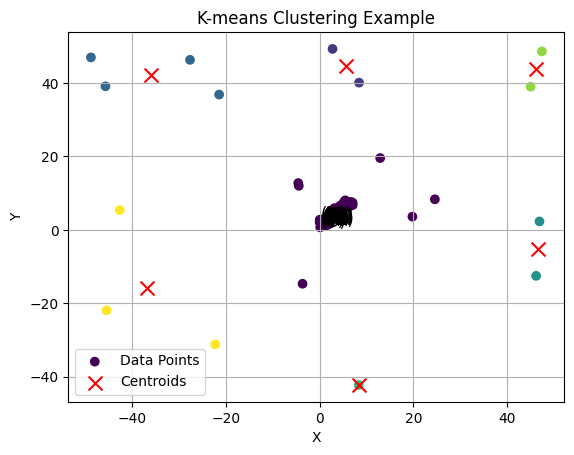

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Extract X and Y values from the DataFrame
data = df[['X', 'Y']].values  # Convert to NumPy array

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)

# Get the cluster centers (centroids) and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Print the final centroids and cluster assignments
print("Final Centroids (Cluster Centers):")
print(centroids)

print("\nCluster Assignments:")
for i, label in enumerate(labels):
    print(f"Point {i + 1}: Cluster {label + 1}")

# Plot the data points and the centroids
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')

# Annotate points (limit to first 26 points to avoid chr() limitation)
for i, point in enumerate(data[:26]):  # Limiting to first 26 points for labeling
    plt.text(point[0] + 0.1, point[1] + 0.1, f'({chr(65 + i)})', fontsize=12)

plt.title('K-means Clustering Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

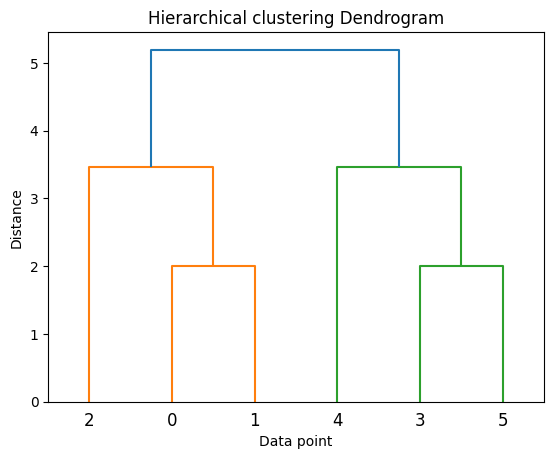

In [7]:
## Example for divisive clustering
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
Z = linkage (X, 'ward') # Ward Distance
dendrogram(Z) #plotting the dendogram
plt.title('Hierarchical clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
plt.show()